# **Загрузка_данных_с_моего_компьютера**

**1. Скачиваем zip-архив в колаб**

**2. Разархивируем картинки с помощью !unzip**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/DOM')

In [ ]:
!unzip "/content/gdrive/MyDrive/Colab Notebooks/DOM/animals.zip"

Archive:  /content/gdrive/MyDrive/Colab Notebooks/DOM/animals.zip
replace animals/test/fox/00000158_224resized.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

__________________________________________

In [ ]:
!pip3 install opencv-python

In [ ]:
!pip3 install glob2

In [ ]:
import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import torchvision
from torchvision import transforms
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import pandas as pd

_____________________________________________

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/DOM')

In [ ]:
train_data_path = '/content/gdrive/MyDrive/Colab Notebooks/DOM/animals/train'

In [ ]:
transforms = transforms.Compose([
              transforms.Resize(64),
              transforms.ToTensor(),
              transforms.Normalize(mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225] )
              ])

In [ ]:
train_data = torchvision.datasets.ImageFolder(root=train_data_path,transform=transforms)

__________________________________________________

In [ ]:
val_data_path = "/content/gdrive/MyDrive/Colab Notebooks/DOM/animals/val"

In [ ]:
val_data = torchvision.datasets.ImageFolder(root=val_data_path,
                                            transform=transforms)

_____________________________________________

In [ ]:
test_data_path = "/content/gdrive/MyDrive/Colab Notebooks/DOM/animals/test"

In [ ]:
test_data = torchvision.datasets.ImageFolder(root=test_data_path,
                                            transform=transforms)

________________________________________________

**!!!!!Шексперемены:**

# **nn.Conv2d**

In [ ]:
test_data[0][0]

In [ ]:
test_data[0][0].shape

torch.Size([3, 64, 64])

In [ ]:
matrix = test_data[0][0]
matrix

tensor([[[-0.4739, -0.5253, -0.6794,  ..., -1.2103, -1.2274, -1.1760],
         [-0.4568, -0.5253, -0.6794,  ..., -1.1075, -1.2788, -1.1760],
         [-0.6965, -0.7308, -0.8164,  ..., -1.0562, -1.2274, -0.9020],
         ...,
         [ 0.9474,  0.9474,  0.7762,  ...,  0.1426,  0.2282,  0.2282],
         [ 0.7762,  0.7762,  0.6906,  ...,  0.1254,  0.4166,  0.3652],
         [ 0.5364,  0.5193,  0.4508,  ...,  0.4166,  0.5364,  0.4679]],

        [[-0.4251, -0.4776, -0.4951,  ..., -1.2304, -1.2479, -1.3179],
         [-0.4251, -0.4426, -0.5476,  ..., -1.1954, -1.3704, -1.3529],
         [-0.5476, -0.5476, -0.6702,  ..., -1.2129, -1.4055, -1.2129],
         ...,
         [ 1.0105,  1.0105,  0.8529,  ...,  0.3627,  0.4678,  0.4328],
         [ 0.7654,  0.7654,  0.7829,  ...,  0.2752,  0.5728,  0.5378],
         [ 0.4328,  0.4328,  0.5378,  ...,  0.5378,  0.6954,  0.6429]],

        [[-1.0376, -1.0550, -0.9504,  ..., -1.4907, -1.4733, -1.4907],
         [-1.0376, -1.0027, -0.9678,  ..., -1

In [ ]:
c = nn.Conv2d(3,1, kernel_size=12, stride = 12,padding=0)

In [ ]:
c(matrix).shape

torch.Size([1, 5, 5])

In [ ]:
c(matrix).squeeze()

tensor([[ 1.0032,  0.2662,  0.6294,  0.6886,  0.6598],
        [ 0.6110, -0.3845, -0.1593,  0.0021,  0.2395],
        [ 0.7308, -0.7248,  0.1683, -0.2726,  0.3193],
        [ 0.5460,  0.4838,  0.0269,  0.2908,  0.2815],
        [-0.0201, -0.3757, -0.9143, -0.0043, -0.1722]],
       grad_fn=<SqueezeBackward0>)

In [ ]:
f = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)

In [ ]:
f(matrix).shape

torch.Size([64, 15, 15])

In [ ]:
f(matrix)

# **nn.MaxPool2d**

In [ ]:
m = nn.MaxPool2d(kernel_size=2, stride=2,padding=1)

In [ ]:
m(c(matrix))

tensor([[[1.0032, 0.6294, 0.6886],
         [0.7308, 0.1683, 0.3193],
         [0.5460, 0.4838, 0.2908]]], grad_fn=<MaxPool2DWithIndicesBackward0>)

________________________________________________________

# **Изучение структуры модели**

# **AlexNet, VGG, ResNet, Inception, DenseNet, SqueezeNet**

In [ ]:
import torchvision.models as models
alexnet = models.alexnet(num_classes=3)

In [ ]:
print(alexnet)

In [ ]:
import torchvision.models as models
resnet = models.resnet18(num_classes=3)

In [ ]:
print(resnet)

___________________________________________________________

# **Пробуем модель**

In [ ]:
import glob
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.utils.data as data_utils
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
import torchvision
from torchvision import transforms
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import pandas as pd

**загружаем модель:**

In [ ]:
from torchvision import models

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
transfer_model = models.resnet50(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

**замораживаем веса модели:**

In [ ]:
for name, param in transfer_model.named_parameters():
    param.requires_grad = False

In [ ]:
print(transfer_model)

**меняем содержание слоя fc загруженной модели**

In [ ]:
transfer_model.fc = nn.Sequential(nn.Linear(transfer_model.fc.in_features,500), nn.ReLU(),
                                  nn.Dropout(), nn.Linear(500,2))

In [ ]:
print(transfer_model)

In [ ]:
batch_size=30
train_data_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_data_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
found_lr = 1e-2

**задаем скорость обучения в слоях:**

In [ ]:
optimizer = optim.Adam(simplenet.parameters(), lr=0.001)

In [ ]:
import torch.optim as optim
optimizer = optim.Adam([{ 'params': transfer_model.layer4.parameters(), 'lr': found_lr /3},
{ 'params': transfer_model.layer3.parameters(), 'lr': found_lr /9},
], lr=found_lr)

**разрешаем изменение градиента в слоях (размораживаем):**

In [ ]:
unfreeze_layers = [transfer_model.layer3, transfer_model.layer4]
for layer in unfreeze_layers:
 for param in layer.parameters():
  param.requires_grad = True

In [ ]:
loss_fn=torch.nn.CrossEntropyLoss()

In [ ]:
train(transfer_model, optimizer, torch.nn.CrossEntropyLoss(), train_data_loader, val_data_loader,device)

<function matplotlib.pyplot.show(*args, **kw)>

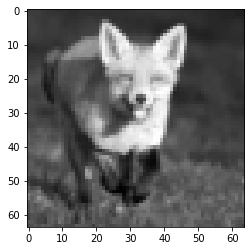

In [ ]:
plt.imshow(train_data[145][0][0], cmap="gray")
plt.show

**изменяем контрастность**

In [ ]:
torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)

ColorJitter(brightness=None, contrast=None, saturation=None, hue=None)

**отражаем по горизонтали/вертикали**

In [ ]:
torchvision.transforms.RandomHorizontalFlip(p=0.5)
torchvision.transforms.RandomVerticalFlip(p=0.5)

RandomVerticalFlip(p=0.5)

**обрезаем картинку**

In [ ]:
torchvision.transforms.RandomCrop(size, padding=None,
pad_if_needed=False, fill=0, padding_mode='constant')
torchvision.transforms.RandomResizedCrop(size, scale=(0.08, 1.0),
ratio=(0.75, 1.3333333333333333), interpolation=2)

**поворот изображения**

In [ ]:
torchvision.transforms.RandomRotation(degrees, resample=False,expand=False,center=None)

**добавляем изображению отступы**

In [ ]:
torchvision.transforms.Pad(padding, fill=0, padding_mode=constant)

**случайным образом меняет изображение**

In [ ]:
torchvision.transforms.RandomAffine(degrees, translate=None, scale=None,
shear=None, resample=False, fillcolor=0)

**преобразование из RGB в HSV стр.95**

In [ ]:
def _random_colour_space(x):
 output = x.convert("HSV")
 return output

In [ ]:
colour_transform = transforms.Lambda(lambda x: _random_colour_space(x))

**рэндомное преобразование из RGB в HSV 50% данных**

In [ ]:
random_colour_transform = torchvision.transforms.RandomApply([colour_transform])